# Applied Machine Learning in Python Week 3

# Evaluation (Değerlendirme)

## Classification Evaluation (Sınıflandırma Değerlendirmesi)

Bir denetimli makine öğrenmesi modelinin ne kadar iyi çalıştığını sadece Train ve Test setlerindeki doğruluğuna bakarak değerlendirmek, modelin performansının tam resmini vermez ve uygulamada başarıyı ölçmek için tam olarak doğru metrikler olmayabilir. Dolayısıyla modelin performansını tam olarak doğru bir biçimde ölçebilmek için daha farklı metriklere ihtiyacımız vardır. 

### Model Evaluation and Selection (Model Değerlendirmesi ve Seçimi)

Sınıflandırma problemlerinde, `imbalance (dengesizlik)` terimi genellikle bir sınıfın diğerine göre çok daha fazla örneğe sahip olduğu durumları ifade eder. Bu durum, özellikle sınıflar arasındaki örnek sayısındaki belirgin farklılıklar olduğunda ortaya çıkar. Kullanacağımız `digits` veri setinde böyle bir durum açığa çıkartıp daha sonrasında RBF SVM modelini uygulayıp modelin doğruluğu hakkında değerlendirme yapacağız ve farklı seçim metriklerine bakacağız.

#### Scikit-Learn'deki digits veri setinde imbalanced (dengesizlik) durumu ve model değerlendirmesi ile seçim metrikleri

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X,y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, pd.value_counts(dataset.target)):
    print(class_name, class_count)

0 183
1 182
2 182
3 181
4 181
5 180
6 179
7 178
8 177
9 174


C:\Users\ozero\AppData\Local\Temp\ipykernel_3232\1131901872.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  for class_name, class_count in zip(dataset.target_names, pd.value_counts(dataset.target)):


+ `load_digits` veri seti, 0'dan 9'a kadar olan el yazılarının bulunduğu bir veri setidir. Bu yüzden `class_name` 0,1,2,..,9 olarak döndürüldü.

In [2]:
#El yazısı 1 olmayan diğer rakamların etiketini 0 yapalım
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print("Orijinal etiketler:", y[1:30])
print("Yeni Binary (İkili) etiketler", y_binary_imbalanced[1:30])
print("\n",pd.value_counts(y_binary_imbalanced))

Orijinal etiketler: [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Yeni Binary (İkili) etiketler [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

 0    1615
1     182
Name: count, dtype: int64


C:\Users\ozero\AppData\Local\Temp\ipykernel_3232\3194722403.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("\n",pd.value_counts(y_binary_imbalanced))


**`y_binary_imbalanced = y.copy():`**

+ Etiket sütunu olan `y`'nin bir kopyasını `y_binary_imbalanced` adlı değişkene atadık.

**`y_binary_imbalanced[y_binary_imbalanced != 1] = 0:`**

+ Etiketi 1 olmayan diğer tüm el yazılarınının etiketini 0 olarak düzenledik. Böylece sadece 2 adet kategori 0 ve 1 olmuş oldu.

**`pd.value_counts(y_binary_imbalanced):`**

+ Bu kodun sonucunda elde edilen 0 ve 1 kategorilerindeki gözlem farkı çok fazla olmuş oldu. İşte bu durum **imbalanced (dengesizlik)** durumunu ortaya çıkardı.

In [3]:
#Imbalanced durumundaki veri setine RBF SVM modelini uyguluyoruz

#Train ve Test setlerini bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

#Modeli oluşuturup eğitiyoruz
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=1).fit(X_train, y_train)

#Modelin doğruluğunu klasik ve basit olan yöntemlerle ölçüyoruz
print("Train setindeki doğruluk:", svm.score(X_train, y_train))
print("Test setindeki doğruluk:", svm.score(X_test, y_test))

Train setindeki doğruluk: 0.9992576095025983
Test setindeki doğruluk: 0.9955555555555555


+ Elde edilen sonuç iyi görünebilir ancak bu sınıflandırma probleminde bir dengesizlik olduğundan dolayı bu sonuç yanıltıcı olabilir. İşte bu sonuçta yanıltıcılığın oldup olmadığını anlamak için `Dummy Classifiers (Sahte Sınıflandırıcılar)` kullanılır.

#### Dummy Classifiers (Sahte Sınıflandırıcılar)

Dummy Classifiers (Sahte Sınıflandırıcılar), gerçek sınıflandırıcıların performansını değerlendirmede ve dengesiz sınıflandırma problemlerini anlamakta faydalıdır. Ayrıca, yeni bir sınıflandırıcı geliştirirken bu basit stratejilerle kıyaslanabilir ve temel bir performans referansı olarak kullanılabilirler. Bunu, giriş özelliklerini (input) göz ardı eden tahminler yaparak gerçekleştirirler.

Yukarıdaki RBF SVM modelinin doğruluğunun ne kadar güvenilir olduğunu görmek için Dummy Classifiers kullanacağız.

In [4]:
#Dummy Classifier modelini oluşturuyoruz
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)

+ `strategy = most_frequent` parametresi, hangi stratejini kullanılacağını belirtir. Burada kullanılan `most_frequent` stratejisi, dummy sınıflandırıcının en sık rastlanan sınıfı tahmin etmek için kullanacağı stratejiyi belirtir. Yani, eğitim veri setindeki en sık rastlanan sınıf hangiyse, dummy sınıflandırıcı tüm örneklerin bu sınıfa ait olduğunu tahmin eder.

In [5]:
#Oluşturduğumuz modele tahmin yaptırıyoruz
print("Dummy Classifier'in tahmini:\n",dummy_majority.predict(X_test))
print("\nSVM modelinin tahmini:\n", svm.predict(X_test))

Dummy Classifier'in tahmini:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]

SVM modelinin tahmini:
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 

+ Bir üstte bahsedildiği gibi DummyClassifier, `most_frequent` stratejisi kullandığı için tüm örneklerin kategorisini en sık tekrar eden 0 kategorisi olarak tahmin etti. Digits veri seti binary (ikili) haldeyken (0 ve 1) dengesiz olduğu için ve 0 olan etiket sayısı 1'e göre çok daha fazla olduğu için doğal olarak DummyClassifier, bütün gözlemleri 0 olarak tahmin etti. Oysa ki SVM modeli, aralarda birkaç tane 1 kategorisi de tahmin etti.

In [6]:
#Dummy Classifier modelinin doğruluğu 
print("Dummy Classifier Test seti doğruluğu:", dummy_majority.score(X_test, y_test))

Dummy Classifier Test seti doğruluğu: 0.9044444444444445


+ Burada gösterilmek istenilen, X_train verileri göz ardı edilerek yani DummyClassifier modeli, veri setinin X_train kısmı ile eğitilmeden, sadece en çok rastlanan verileri ele alarak yaptığı tahminlerin doğruluğu 0.90 gibi yüksek bir sayı oluyor. Bu sayı da X_train ile eğitilmiş olan SVM modelinin doğruluk oranına çok yakın. Bu durum, veri setinde bir dengesizlik olduğunun açık bir göstergesidir. 

Aynı karşılaştırma yöntemi, Regresyon problemleri için de mevcuttur. Bunun için ise **DummyRegressors** kullanılır. `strategy` paramtersi, `mean, median, quantile, constant` girdilerini alarak bu girdilere göre işlem yapabilir.

### Confusion Matrix (Karışıklık Matrisi)

Confusion Matrix (Karışıklık Matrisi), bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir tablodur. Bu matrix, gerçek sınıf etiketleriyle modelin tahmin ettiği sınıf etiketlerini karşılaştırır ve bu karşılaştırmaya dayalı olarak farklı performans ölçümlerini hesaplamak için kullanılır.

Confusion Matrix 4 bölümden oluşur: 

+ **True Negative (Doğru-Negatif):** Gerçek değer negatif (0) iken modelin tahmininin de negatif (0) olduğu durumdur
+ **False Positive (Yanlış-Pozitif):** Gerçek değer negatif (0) iken modelin tahmininin pozitif (1) olduğu durumdur (Type 1 Error = 1. Tip Hata)
+ **False Negative (Yanlış-Negatif):** Gerçek değer pozitif (1) iken modelin tahmininin negatif (0) olduğu durumdur (Type 2 Error = 2. Tip Hata)
+ **True Positive (Doğru-Pozitif):** Gerçek değer pozitif (1) iken modelin tahmininin de pozitif (1) olduğu durumdur

+ Yani özetle, **True-False** kısmı modelin tahminlerinin doğruluğunu gösterirken, **Positive-Negative** kısmı modelin tahmin değerlerini gösteriyor.

Görsel olarak: 

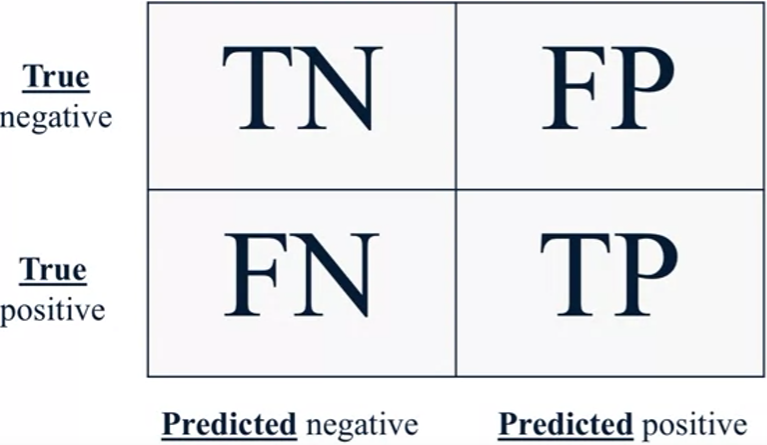

şeklindedir. Bu durum, Binary (ikili) sınıflandırma problemlerinde geçerlidir. Eğer K sınıflı bir sınıflandırma problemimiz varsa **K x K** şeklinde matrise sahip oluruz. 

#### Scikit-Learn'deki Digits veri setini Binary Classification (İkili Sınıflandırma) problemine dönüştürüp, Linear SVM, Logistic Regression, DecisionTrees ve DummyClassifer modelleri için Confusion Matrix'in Scikit-Learn ile oluşturulması

In [7]:
#Veri setinin içe aktarılması 
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

#Veri setindeki tüm etkiletlerin gözlem sayıları
for class_name, class_count in zip(dataset.target_names, pd.value_counts(dataset.target)):
    print(class_name, class_count)

#El yazısı 1 olmayan diğer rakamların etiketini 0 yapalım
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print("\nOrijinal etiketler:", y[1:30])
print("Yeni Binary (İkili) etiketler", y_binary_imbalanced[1:30])
print("\n",pd.value_counts(y_binary_imbalanced))

0 183
1 182
2 182
3 181
4 181
5 180
6 179
7 178
8 177
9 174

Orijinal etiketler: [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Yeni Binary (İkili) etiketler [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

 0    1615
1     182
Name: count, dtype: int64


C:\Users\ozero\AppData\Local\Temp\ipykernel_3232\945525847.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  for class_name, class_count in zip(dataset.target_names, pd.value_counts(dataset.target)):
C:\Users\ozero\AppData\Local\Temp\ipykernel_3232\945525847.py:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("\n",pd.value_counts(y_binary_imbalanced))


In [8]:
#Train ve Test setlerin ayrılması
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state = 0)

#### Dummy Classifier modeli için Confusion Matrix

In [9]:
#Dummy Classifier modelinin oluşturulması ve eğitilmesi
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)

#Dummy Classifier modelinin ne kadar doğru sınıflandırma yaptığını görebilmek için Confusion Matrix oluşturulması
from sklearn.metrics import confusion_matrix
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print("DummyClassifier modelinin Confusion Matrisi\n", confusion)

DummyClassifier modelinin Confusion Matrisi
 [[407   0]
 [ 43   0]]


+ TN (True Negative) = 407. Yani model 407 adet 0 olan veriyi, 0 olarak tahmin edebilmiş.
+ FN (False Negative) = 43. Yani model 43 adet 1 olan veriyi, 0 olarak tahmin etmiş. Bu da 43 adet Type 2 hataya sebep olduğu anlamına geliyor.
+ FP (False Positive) = 0. Yani model 0 adet 0 olan veriyi, 1 olarak tahmin etmiş. Bu da 0 adet Type 1 hata demektir
+ TP (True Positive) = 0. Yani model 0 adet 1 olan veriyi, 1 olarak tahmin etmiş.  

#### Linear SVM modeli için Confusion Matrix

In [10]:
#Linear SVM modeli için Confusion Matrix'in oluşturulması 

#SVM modelinin oluşturulması ve eğitilmesi
from sklearn.svm import SVC
lnrsvm = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

#SVM modelinin ne kadar doğru sınıflandırma yaptığını görebilmek için Confusion Matrix oluşturulması
from sklearn.metrics import confusion_matrix
lnrsvm_predicted = lnrsvm.predict(X_test)
confusion = confusion_matrix(y_test, lnrsvm_predicted)

print("Linear SVM modelinin Confusion Matrisi\n", confusion)

Linear SVM modelinin Confusion Matrisi
 [[402   5]
 [  5  38]]


+ TN (True Negative) = 402. Yani model 402 adet 0 olan veriyi, 0 olarak tahmin edebilmiş.
+ FN (False Negative) = 5. Yani model 5 adet 1 olan veriyi, 0 olarak tahmin etmiş. Bu da 5 adet Type 2 hataya sebep olduğu anlamına geliyor.
+ FP (False Positive) = 5. Yani model 5 adet 0 olan veriyi, 1 olarak tahmin etmiş. Bu da 5 adet Type 1 hataya sebep olduğu anlamına geliyor. 
+ TP (True Positive) = 38. Yani model 38 adet 1 olan veriyi, 1 olarak tahmin etmiş.  iş.

#### Logistic Regression modeli için Confusion Matrix

In [11]:
#Logistic Regression modeli için Confusion Matrix'in oluşturulması

#Logistic Regression modelinin oluşturulması ve eğitilmesi
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

#Logistic Regression modelinin ne kadar doğru sınıflandırma yaptığını görebilmek için Confusion Matrix oluşturulması
from sklearn.metrics import confusion_matrix
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print("Logistic Regression modelinin Confusion Matrisi\n", confusion)

Logistic Regression modelinin Confusion Matrisi
 [[401   6]
 [  8  35]]


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ TN (True Negative) = 401. Yani model 401 adet 0 olan veriyi, 0 olarak tahmin edebilmiş.
+ FN (False Negative) = 8. Yani model 8 adet 1 olan veriyi, 0 olarak tahmin etmiş. Bu da 8 adet Type 2 hataya sebep olduğu anlamına geliyor.
+ FP (False Positive) = 6. Yani model 6 adet 0 olan veriyi, 1 olarak tahmin etmiş. Bu da 6 adet Type 1 hataya sebep olduğu anlamına geliyor. 
+ TP (True Positive) = 35. Yani model 35 adet 1 olan veriyi, 1 olarak tahmin etmiş.  

#### Decision Tree modeli için Confusion Matrix

In [12]:
#Decision Tree modeli için Confusion Matrix'in oluşturulması

#DecisionTree modelinin oluşturulması ve eğitilmesi
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

#Decision Tree modelinin ne kadar doğru sınıflandırma yaptığını görebilmek için Confusion Matrix oluşturulması
from sklearn.metrics import confusion_matrix
dt_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, dt_predicted)
print("Decision Tree modelinin Confusion Matrisi\n", confusion)

Decision Tree modelinin Confusion Matrisi
 [[400   7]
 [ 17  26]]


+ TN (True Negative) = 400. Yani model 400 adet 0 olan veriyi, 0 olarak tahmin edebilmiş.
+ FN (False Negative) = 17. Yani model 17 adet 1 olan veriyi, 0 olarak tahmin etmiş. Bu da 17 adet Type 2 hataya sebep olduğu anlamına geliyor.
+ FP (False Positive) = 7. Yani model 7 adet 0 olan veriyi, 1 olarak tahmin etmiş. Bu da 7 adet Type 1 hataya sebep olduğu anlamına geliyor. 
+ TP (True Positive) = 26. Yani model 26 adet 1 olan veriyi, 1 olarak tahmin etmiş.

### Evaluation Metrics for Binary Classification (İkili Sınıflandırma için Değerlendirme Metrikleri)

İkili sınıflandırma için değerlendirme metrikleri:

**Accuracy (Doğruluk):** 
+ Doğru olarak sınıflandırılan örneklerin oranını gösterir. Formülü: $\frac{TP + TN}{TP + TN + FP + FN}$ şeklindedir.
+ Yüksek doğruluk, daha iyi bir performans gösterir ancak dengesiz veri setlerinde güvenilir olmayabilir.

**Precision (Hassasiyet):** 
+ Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. (``FP Minimize etmek için``). Formülü: $\frac{TP}{TP + FP}$ şeklindedir.
+ Yüksek hassasiyet, yanlış pozitif oranının az olduğu anlamına gelir. (Type 1 Error miktarı azdır)

**Recall (Duyarlılık):** 
+ Gerçek pozitiflerin ne kadarının doğru bir şekilde tanımlandığını gösterir. (``FN Minimize etmek için``). Formülü: $\frac{TP}{TP + FN}$ şeklindedir.
+ Yüksek duyarlılık, yanlış negatif oranının az olduğu anlamına gelir. (Type 2 Error miktarı azdır)
    
**F-1 Score (F-1 Skoru):** 
+ Hassasiyet ve duyarlılık arasındaki dengeyi sağlar. Formülü: $\frac{ 2 * (Precision * Recall) }{ Precision + Recall }$
+ Dengeli bir sınıflandırma performansı sağlamaya yardımcı olur. (Type 1 ve Type 2 arasındaki dengeyi sağlar)

**Classification Error (Sınıflandırma Hatası):** 
+ Yanlış olarak sınıflandırılan örneklerin oranını gösterir. Formülü: $\frac{FP + FN}{TN + TP + FN + FP}$
+ Yüksek sınıflandırma hatası, modelin fazla hata yaptığını gösterir.

**Specificity (Özgünlük) veya True Negative Rate (Doğru-Negatif Oranı):** 

+ Negatif olarak tahmin edilen örneklerin, gerçekten ne kadarının negatif olduğunu gösterir. Formülü: $\frac{TN}{TN + FP}$ şeklindedir.

    

#### Scikit-Learn Digits veri setini 2 kategorili hale getirip ikili sınıflandırma problemli oluşturduktan sonra Dummy Classifier, Linear SVM, Logistic Regression ve Decision Tree modellerini uygulayıp, bu modeller üzerinde ikili sınıflandırma metriklerini hesaplama

In [13]:
#Veri setinin içe aktarılması ve X ile y değişkenlerine input ile output değerlerinin atanması
from sklearn.datasets import load_digits
dgt = load_digits()
X = dgt.data
y = dgt.target

#Çoklu sınıflandırma problemi şeklinde olan veri setini ikili sınıflandırma problemi haline getirelim
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

#Train ve Test setlerini bölelim 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

#DummyClassifier modelinin oluşturulması, eğitilmesi ve X_test verilerine tahminleri
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
dummy_predicted = dummy_majority.predict(X_test)

#Linear SVM modeli modelinin oluşturulması, eğitilmesi ve X_test verilerine tahminleri
from sklearn.svm import SVC
lnrsvm = SVC(kernel = "linear", C = 1).fit(X_train, y_train)
lnrsvm_predicted = lnrsvm.predict(X_test)

#Logistic Regression modelinin oluşturulması, eğitilmesi ve X_test verilerine tahminleri
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

#Decision Tree modelinin oluşturulması, eğitilmesi ve X_test verilerine tahminleri
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#İkili sınıflandırma metriklerinin DecisionTree üzerinde örnek olması adına uygulanması
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("DecisionTree modelinin Accuarcy (Doğruluk) Skoru:", accuracy_score(y_test, dt_predicted))
print("DecisionTree modelinin Precision (Hassasiyet) Skoru:", precision_score(y_test, dt_predicted))
print("DecisionTree modelinin Recall (Duyarlılık) Skoru:", recall_score(y_test, dt_predicted))
print("DecisionTree modelinin F-1 Skoru:", f1_score(y_test, dt_predicted))

DecisionTree modelinin Accuarcy (Doğruluk) Skoru: 0.9466666666666667
DecisionTree modelinin Precision (Hassasiyet) Skoru: 0.7878787878787878
DecisionTree modelinin Recall (Duyarlılık) Skoru: 0.6046511627906976
DecisionTree modelinin F-1 Skoru: 0.6842105263157895


In [15]:
#Tüm metrikleri içeren fonksiyon ile modeller üzerine uygulanması
from sklearn.metrics import classification_report
print("DummyClassifier modeli için:\n", classification_report(y_test, dummy_predicted, target_names = ["0", "1"]))
print("Linear SVM modeli için:\n", classification_report(y_test, lnrsvm_predicted, target_names = ["0", "1"]))
print("Logistic Regression modeli için:\n", classification_report(y_test, lr_predicted, target_names = ["0", "1"]))
print("Decision Tree modeli için:\n", classification_report(y_test, dt_predicted, target_names = ["0", "1"]))


DummyClassifier modeli için:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       407
           1       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450

Linear SVM modeli için:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic Regression modeli için:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Decision Funcitons (Karar Fonksiyonları)

Decision Funcitons (Karar Fonksiyonları), modelin yaptığı tahminin güvenilirliğini hesaplar. Bunu `decision_function()` veya `predict_proba()` işlevini kullanarak yaparlar. Bu işlem, test noktaları (X_test) fonksiyona verildiğinde:

+ **decision_funciton()**, her bir test noktası için bir sınıflandırıcı skor değeri üretir. Bu değer, her bir veri noktası için bir mesafe ölçüsüdür ve pozitif ile negatif sınıflar arasındaki ayırıcı hiperdüzleme olan uzaklığı gösterir.Yani, sınıflandırıcının pozitif sınıfı (1) veya negatif sınıfı (0) ne kadar güvenle tahmin ettiğini gösterir, yapılan tahminin güvenilirliğini hesaplamış olur. Özellikle SVM modellerinde kullanılır.

+ **predict_proba()**, her veri noktası için, her etikete bir olasılık değeri sağlar ve modelin veri noktasını hangi sınıfa kaç olasılıkla etiketlediğini hesaplar. Özellikle çoklu sınıflı sınıflandırma problemlerinde bu yöntem, her bir sınıf için bir olasılık dağılımı sağlar. Bu olasılıklar, 0 ile 1 arasındadır ve toplam olasılıklar genellikle 1'e eşittir. Örneğin, bir üç sınıflı bir sınıflandırma problemi olduğunu varsayalım. "predict_proba" yöntemi, her bir veri noktası için bu üç sınıftan her biri için bir olasılık değeri sağlayacaktır. Bu olasılıklar, modelin belirli bir veri noktasını hangi sınıfa daha güçlü bir şekilde tahmin ettiğini gösterir.r.

#### Logistic Regression modelinde `decision_funciton()` ve `predict_proba()` işlevlerini kullanma

In [16]:
#Veri setinin içe aktarılması ve X ile y değişkenlerine input ile output değerlerinin atanması
from sklearn.datasets import load_digits
dgt = load_digits()
X = dgt.data
y = dgt.target

#Çoklu sınıflandırma problemi şeklinde olan veri setini ikili sınıflandırma problemi haline getirelim
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

#Train ve Test setlerini bölelim 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

In [17]:
#Logistic Regression modelinin kurulması ve eğitilmesi 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#decision_funciton() kullanarak modele verilen X_test girdilerinin güvenilirliğini görme
y_scores_lr = lr.decision_function(X_test)
list(zip(y_test[0:20], y_scores_lr[0:20]))

[(0, -29.828753536956427),
 (0, -19.382662869761983),
 (0, -29.198975490372103),
 (0, -21.74660592515811),
 (0, -22.642309847840455),
 (0, -11.805690486217467),
 (1, 6.495980396991818),
 (0, -23.354775894772686),
 (0, -27.544929498112378),
 (0, -26.888192028450277),
 (0, -31.86378158534554),
 (0, -22.485935641418717),
 (0, -25.318113350156526),
 (0, -13.384385085236122),
 (0, -13.565746668311496),
 (0, -13.308195160263162),
 (1, 12.181405226308264),
 (0, -34.36224097334574),
 (0, -13.231662233238945),
 (0, -29.594125348762866)]

+ Görüleceği üzere soldaki etiketler y_test (modeli test etme amaçlı ayrılan çıktı sütunu) ve sağdakiler modele girilen X_test (modeli test etme amaçlı ayrılan girdi sütunu)dur. Pozitif bir skor, bir veri noktasının bir sınıfa ait olduğunu belirtebilirken, negatif bir skor diğer sınıfa ait olduğunu belirtebilir. Skor ne kadar büyük veya küçükse, o kadar güvenilir veya belirsiz bir sınıflandırma kararı olduğunu ifade eder. 1. satır için yapılan tahminin kuvvetle doğru olduğu yorumu yapılabilir.

In [19]:
#predict_proba() kullanarak modele verilen X_test girdilerinin hangi sınıflara kaç olasılıkla etiketlendiğini görme
y_proba_lr = lr.predict_proba(X_test)
list(zip(y_test[0:20], y_proba_lr[0:20]))

[(0, array([1.00000000e+00, 1.11054698e-13])),
 (0, array([9.99999996e-01, 3.82134694e-09])),
 (0, array([1.000000e+00, 2.084712e-13])),
 (0, array([1.0000000e+00, 3.5939253e-10])),
 (0, array([1.00000000e+00, 1.46747184e-10])),
 (0, array([9.99992538e-01, 7.46191893e-06])),
 (1, array([0.00150722, 0.99849278])),
 (0, array([1.00000000e+00, 7.19697017e-11])),
 (0, array([1.00000000e+00, 1.08990618e-12])),
 (0, array([1.00000000e+00, 2.10187349e-12])),
 (0, array([1.00000000e+00, 1.45122745e-14])),
 (0, array([1.0000000e+00, 1.7158615e-10])),
 (0, array([1.00000000e+00, 1.01037614e-11])),
 (0, array([9.99998461e-01, 1.53898627e-06])),
 (0, array([9.99998716e-01, 1.28372063e-06])),
 (0, array([9.99998339e-01, 1.66082379e-06])),
 (1, array([5.12484462e-06, 9.99994875e-01])),
 (0, array([1.00000000e+00, 1.19307669e-15])),
 (0, array([9.99998207e-01, 1.79292171e-06])),
 (0, array([1.00000000e+00, 1.40421842e-13]))]

+ Bu çıktıda sol kısımda örneklerin gerçek sınıf etiketi ve sağ kısımdaki array'de hangi sınıfı tahmin etme olasılığı vardır.

In [20]:
list(zip(y_test[0:20], y_proba_lr[0:20,1]))

[(0, 1.1105469835989011e-13),
 (0, 3.821346943056565e-09),
 (0, 2.0847120048713012e-13),
 (0, 3.5939253033015894e-10),
 (0, 1.4674718378198612e-10),
 (0, 7.461918925818461e-06),
 (1, 0.9984927805559267),
 (0, 7.196970172557209e-11),
 (0, 1.0899061785537498e-12),
 (0, 2.1018734949818933e-12),
 (0, 1.4512274514379776e-14),
 (0, 1.715861502569329e-10),
 (0, 1.010376135354985e-11),
 (0, 1.5389862704636484e-06),
 (0, 1.2837206328481565e-06),
 (0, 1.6608237876202734e-06),
 (1, 0.9999948751553785),
 (0, 1.193076686654475e-15),
 (0, 1.792921714271069e-06),
 (0, 1.4042184155839087e-13)]

+ Bu çıktıda ise modelin, soldaki gerçek etiketleri tahmin etme olasılıkları vardır.

### Precision (Hassasiyet) - Recall (Duyarlılık) Eğrileri

Precision (Hassasiyet) - Recall (Duyarlılık) eğrileri, bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir metrikler kombinasyonunu görselleştiren grafiklerdir. Bu eğriler, modelin doğruluğunu, yanlış pozitifleri (FP) ve yanlış negatifleri (FN) dağılımını anlamak için önemli bilgiler sağlar. Özellikle dengesiz sınıflandırma problemlerinde (örneğin, nadir sınıfların olduğu durumlar), Precision - Recall eğrileri, modelin performansını daha ayrıntılı bir şekilde değerlendirmek için kullanılır.

Precision-Recall Curve örneği:

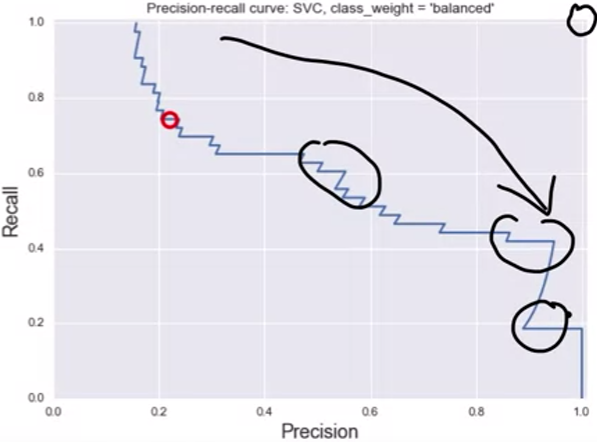

+ İdeal bir sınıflandırıcı, Precision-Recall eğrisinde grafiğin en sağ üst köşesinde yani Precision = 1.0 ve Recall = 1.0 olacak şekilde bir geri çağırım elde edebilmedilir. 
+ P-R eğrisinin altındaki alan, sınıflandırıcının performansını özetler. AUC değeri (P-R eğrisinin altında kalan alan) ne kadar yüksekse, sınıflandırıcının performansı o kadar iyidir. AUC değeri 1'e yaklaştıkça, sınıflandırıcının doğruluğu ve kesinliği artar.

### ROC Eğrileri

ROC eğrileri, ikili sınıflandırma problemleri için kurulan modellerin performansını gösteren bir görselleştirme yöntemidir. ROC eğrilerinin X ekseninde modelin `False Positive (FP = Type 1 Error)` oranı, Y ekseninde modelin `True Positive (TP)` oranı bulunur. 

ROC eğrisi örneği:

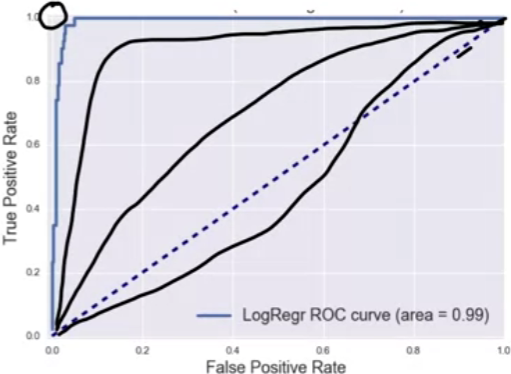

+ İdeal bir sınıflandırıcı False Positive (FP) oranını düşük tutarken, True Positive (TP) oranını yüksek tutar. Dolayısıyla, ROC eğrisinin sol üst köşesindeki bir nokta, ideal bir performansı temsil eder.
+ ROC eğrisinin altındaki alan, sınıflandırıcının performansını özetler. AUC değeri (ROC eğrisinin altında kalan alan) ne kadar yüksekse, sınıflandırıcının performansı o kadar iyidir. AUC değeri 1'e yaklaştıkça, sınıflandırıcının doğruluğu ve kesinliği artar.
+ Farklı sınıflandırıcıların performansını karşılaştırmak için ROC eğrileri kullanılır. Eğriler arasındaki en üstün eğri, en iyi performansa sahip sınıflandırıcıyı temsil eder.

### MultiClass Evaluation (Çok Sınıflı Sınıflandırma Problemlerinin Değerlendirmesi)

Çok sınıflı sınıflandırma problemlerinin değerlendirmesi, bir makine öğrenimi modelinin çoklu sınıf etiketlerini tahmin etme yeteneğini değerlendirmek için kullanılan bir dizi teknik ve metriği içerir. Çok sınıflı sınıflandırma, veri kümesinde birden fazla sınıfın olduğu durumları ele alır. İkili sınıflandırma problemlerinde olduğu gibi;

+ Confusion Matrix
+ Accuracy
+ Precision
+ Recall
+ F-1 Score gibi değerlendirme metrikleri vardır. Çok sınıflı sınıflandırma problemlerinin değerlendirilmesi, modelin her bir sınıfı doğru bir şekilde tanıma yeteneğini anlamak, performansını ölçmek ve modelin zayıf yönlerini belirlemek için önemlidir.

#### Scikit-Learn Digits veri setine Linear SVM modelini uygulayıp bu modeli MultiClass Evaluaiton metriklerini kullanarak değerlendirme

In [21]:
#Veri setinin içe aktarılması
from sklearn.datasets import load_digits
dataset = load_digits()

#Input ve Output verilerinin değişkenlere atanması
X = dataset.data
y = dataset.target

#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Linear SVM modelinin oluşturulması ve eğitilmesi
from sklearn.svm import SVC
lsvm = SVC(kernel = "linear").fit(X_train, y_train)

In [22]:
#Confusion Matrix'in oluşturulması
from sklearn.metrics import confusion_matrix
lsvm_predicted = lsvm.predict(X_test)
confusion = confusion_matrix(y_test, lsvm_predicted)

#Oluşturulan Matrix'in DataFrame haline getirilmesi (Grafiğin çizdirilebilmesi için)
ldf_cm = pd.DataFrame(confusion)

Text(0.5, 14.722222222222216, 'Predicted Label')

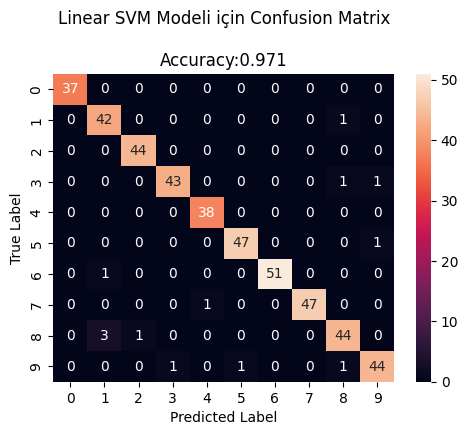

In [23]:
#Confusion Matrix'in grafiği
import seaborn as sns
from sklearn.metrics import accuracy_score
plt.figure(figsize = (5.5,4))
sns.heatmap(ldf_cm, annot = True)
plt.title("Linear SVM Modeli için Confusion Matrix\n \nAccuracy:{0:.3f}".format(accuracy_score(y_test, lsvm_predicted)))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [24]:
#classification_report() işlevi ile accuracy, precision, recall, f1 score gibi metrikleri hesaplatalım
from sklearn.metrics import classification_report
print("Linear SVM için Metrikler:\n", classification_report(y_test, lsvm_predicted))

Linear SVM için Metrikler:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



#### Scikit-Learn Digits veri setine RBF SVM modelini uygulayıp bu modeli MultiClass Evaluaiton metriklerini kullanarak değerlendirme

In [25]:
#Veri setinin içe aktarılması
from sklearn.datasets import load_digits
dataset = load_digits()

#Input ve Output değerlerinin değişkenlere atanması
X = dataset.data
y = dataset.target

#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#RBF SVM modelinin oluşturulması ve eğitilmesi
from sklearn.svm import SVC
rsvm = SVC(kernel = "rbf").fit(X_train, y_train)

In [26]:
#RBF SVM modelin için Confusion Matrix'in oluşturulması
from sklearn.metrics import confusion_matrix
rsvm_predicted = rsvm.predict(X_test)
confusion = confusion_matrix(y_test, rsvm_predicted)

#Oluşturulan Matrix'in DataFrame haline getirilmesi (Grafiğin çizdirilebilmesi için)
rdf_cm = pd.DataFrame(confusion)

Text(0.5, 14.722222222222216, 'Predicted Label')

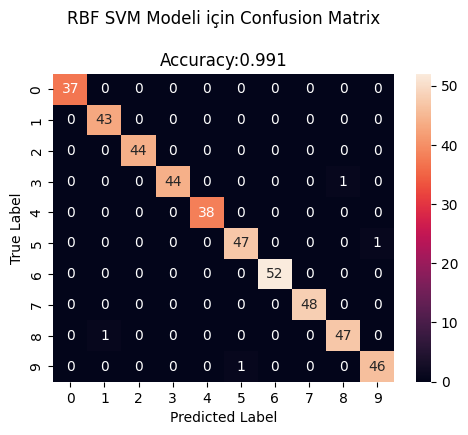

In [27]:
#Confusion Matrix'in grafiği
import seaborn as sns
plt.figure(figsize = (5.5,4))
sns.heatmap(rdf_cm, annot = True)
plt.title("RBF SVM Modeli için Confusion Matrix\n \nAccuracy:{0:.3f}".format(accuracy_score(y_test, rsvm_predicted)))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [28]:
#classification_report() işlevi ile accuracy, precision, recall, f1 score gibi metrikleri hesaplatalım
from sklearn.metrics import classification_report
print("RBF SVM için metrikler:\n", classification_report(y_test, rsvm_predicted))

RBF SVM için metrikler:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Micro-Macro Averaged Metrics (Mikro-Makro Ortalamalı Metrikler)

Mikro ve makro ortalamalı metrikler, çok sınıflı sınıflandırma problemlerinin değerlendirilmesinde kullanılan farklı hesaplama yöntemleridir. Bu metrikler, çok sınıflı sınıflandırma problemlerinde doğruluk, hassasiyet, duyarlılık ve F1-skoru gibi performans ölçütlerini sınıflar arasında nasıl hesaplayacağımızı belirler.

**Micro Averaged Metrics (Mikro Ortalamalı Metrikler):** 

+ Tüm sınıfların performansını topluca hesaplar.
+ Doğruluk, hassasiyet, duyarlılık ve F1-skoru, tüm sınıfların doğru tahmin edilen örneklerinin toplam gerçek örnek sayısına oranını hesaplar.
+ Her bir örneği ayrı ayrı değil, toplu olarak ele alır ve sınıflar arasındaki dengesizliği dikkate almaz.

**Macro Averaged Metrics (Makro Ortalamalı Metrikler):**

+ Her bir sınıf için performans metriklerini ayrı ayrı hesaplar ve ardından sınıflar arasında bir ortalamayı alır.
+ Doğruluk, hassasiyet, duyarlılık ve F1-skoru, her bir sınıfın metriklerinin ortalamasını alır.
+ Sınıflar arasındaki dengesizliği göz önünde bulundurur ve her sınıfın performansına eşit ağırlık verir.

+ Macro Averaged Metrics şu şekilde işler:

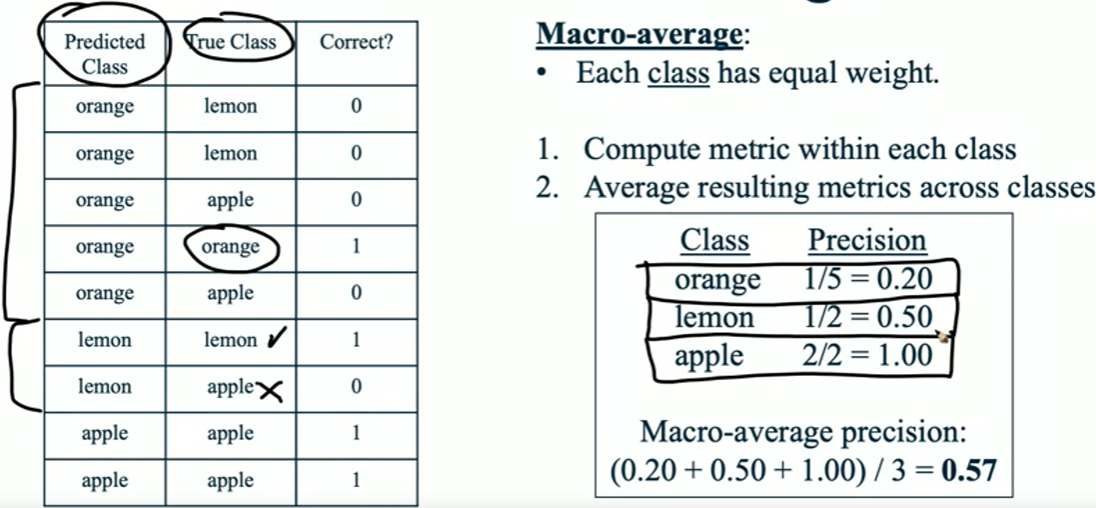

Veri setindeki her kategorideki her veri noktası için yapılan tahminlerin doğruluk oranı hesaplanır ve her etiket için belirli bir oran elde edilir. Ardından bu oranların ortalaması alınır. Bu bilgi, çok sınıflı bir sınıflandırma problemi için her bir sınıfın tahmin doğruluğunu verir.

+ Mikro ortalamalı metrik şu şekilde işler:

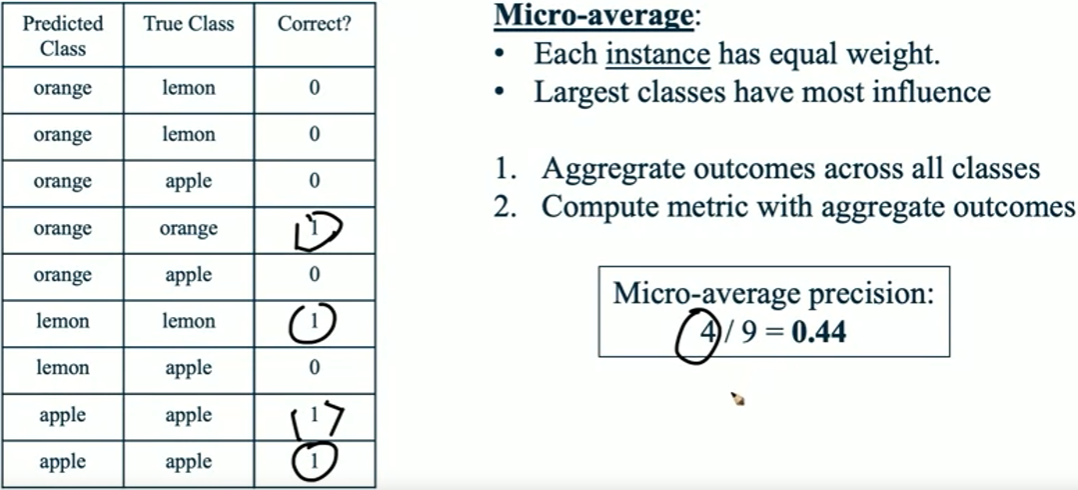

Veri setindeki her nokta için yapılan tahminlerin ne kadar doğru olduğunun oranını verir. Bu bilgi, tüm veri setindeki tahminlerin doğruluğunu verir.

#### `precision_score()` işlevinde, yani hassasiyet metriğinde makro ve mikro ortalamalı metriklerin alınması (mikro-makro ortalama hassasiyeti)

In [29]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, rsvm_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, rsvm_predicted, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


+ Mikro ortalamalı hassasiyet 0.99'dur. Yani modelin tüm örnekler için tahmin doğruluğu yüksektir
+ Makro ortalamalı hassasiyet 0.99'dur. Yani her sınıfın hassasiyeti yüksektir ve sınıflar arası dengeli bir performans vardır

#### `f1_score()` işlevinde, yani f-1 score metriğinde makro ve mikro ortalamalı metriklerin alınması (mikro-makro ortalama f-1 skoru)

In [30]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, rsvm_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, rsvm_predicted, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


+ Mikro ortalamalı f-1 skoru 0.99'dur. Yani modelin tüm örnekler için hassasiyet ve duyarlılık dengesi yüksektir.
+ Makro ortalamalı f-1 skoru 0.99'dur. Yani her sınıfın hassasiyet ve duyarlılık dengesi yüksektir ve sınıflar arasında dengeli bir performans vardır.

## Regression Evaluation (Regresyon Değelendirmesi)

Sınıflandırma problemleri için kurulan modelleri daha detaylı değerlendirmek ve model seçimini daha güvenilir bir şekilde yapmak için kullanılan metrikler vardı. Aynı olay Regresyon problemleri için de geçerlidir. Regresyon problemlerini daha ayrıntılı değerlendirmek ve model seçimini daha güvenilir yapabilmek için kullanılan bu metrikleri, Regresyon modelinin tahmin edilen değeri hedef değerden çok daha büyük olduğu durumları bir tür hata olarak kategorize etmede kullanabiliriz. Karşılaştırıldığında, tahmin edilen değer hedef değerden çok daha küçük olduğu durumları ikinci bir hata türü olarak değerlendirebiliriz. 

Ancak uygulamaya gelecek olursak, Regresyon için bu tür farklı hataları ayırt etmenin çoğu durumda önemli olmadığı ortaya çıkıyor. Bu, regresyon için değerlendirmeyi oldukça basitleştiriyor. Çoğu durumda, regresyon için kullanılabilen varsayılan $R^2$ skoru (Scikit-Learn'de `score()` işlevi sonucu elde edilen sonuç yani), gelecekteki örneklerin ne kadar iyi tahmin edileceğini özetler. Bu, çoğu görev için yeterlidir. 

Yaygın olarak kullanılan metrikler:

**$R^2$ Score ($R^2$ Skoru):** 
+ Bağımsız değişkenlerin, bağımlı değişkeni ne kadar iyi açıkladığını ölçer. $R^2$ skoru, toplam varyansın ne kadarının bağımsız değişkenler tarafından açıklandığını gösterir. En iyi değer 1'dir ve daha yüksek değerler daha iyi bir uyum anlamına gelir. `score()`
+ Değeri 0 ile 1 arasındadır ve 1'e yakın bir $R^2$ skoru, modelin verileri iyi açıkladığını gösterir. 0'a yaklaşan değerler, modelin verileri açıklamada yetersiz olduğunu gösterir.

**Mean Absolute Error (MAE = Ortalama Mutlak Hata):** 
+ Gerçek ve tahmin edilen değerler arasındaki mutlak farkların ortalamasıdır. MAE, her hata değerini mutlak değer alarak hesaplar, bu nedenle hata büyüklükleri arasında dönüşü olmaz. `mean_absolute_error()`
+ Daha düşük bir MAE, modelin daha iyi performans verdiğini gösterir.

**Mean Square Error (MSE = Ortalama Kare Hatası):**  
+ Gerçek ve tahmin edilen değerler arasındaki kare farkların ortalamasıdır. MSE, büyük hataların daha fazla ağırlığa sahip olduğu için büyük hatalara daha duyarlıdır. `mean_square_error()`
+ Daha düşük bir MSE, modelin daha iyi performans verdiğini gösterir. MSE'de büyük hatalar daha fazla ağırlığa sahip olduğu için büyük hatalara daha duyarlıdır.

Veri setinde aykırı değerlerle karşılaşma durumunda ise (Sınıflandırma problemlerinde, veri setinin dengesiz olması gibi bir problem. Aynı şey değil ama ikisi de problem sonuçta) ve aykırı değerlerin göz ardı edilmesi gerekiyorsa: 

**Median Absolute Error (Medyan Mutlak Hata):** 
+ Gerçek ve tahmin edilen değerler arasındaki mutlak farkların medyanıdır. Aykırı değerlerden etkilenmeyen bir metrik olduğundan dolayı, Ortalama metrikleri yerine kullanılabilir.
+ Daha düşük bir medyan mutlak hata, modelin daha iyi performans verdiğini gösterir.

Ayrıca, Sınıflandırma problemlerinde `DummyClassifier` olduğu gibi Regresyon problemlerinde de `DummyRegressor` vardır. Bu işlev, input verilerine bakmayan basit stratejiler kullanarak tahminler sağlayan bir `DummyRegressor` sınıfı vardır. 

### Scikit-Learn diabetes veri seti üzerinde Lineer Regresyon modelinin kurulması ve bu modeli değerlendirmek için `DummyRegressor` sınıfını kullanıp daha sonrasında metrikler ile karşılaştırma yapılması 

In [31]:
#Veri setinin içe aktarılması
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#Input ve Output verilerinin değişkenlere atanması 
X = diabetes.data[:, None, 6]
y = diabetes.target

print(X[:5])
print("\n", y[:5])

[[-0.04340085]
 [ 0.07441156]
 [-0.03235593]
 [-0.03603757]
 [ 0.00814208]]

 [151.  75. 141. 206. 135.]


**`X = diabetes.data[:, None, 6]:`**

+ `diabetes` veri setinden sadece 6. sütunu alıyor ve bu sütunu 2 boyutlu bir diziye dönüştürüyor. Yani, ``diabetes.data`` içerisindeki 6. sütunu tek boyutlu bir dizi olarak alır ve bu diziyi yeniden boyutlandırarak her bir öğenin tek bir sütunda olduğu bir matris oluşturur.
+ ``None`` kullanımı, boyutu 1 olan bir boyut ekler. Bu, ``diabetes.data[:, None, 6]`` ifadesinin bir sütun vektörü oluşturduğu anlamına gelir. Bu ifade, genellikle bir sütun vektörü oluşturmak için kullanılır ve verinin tek boyutlu olup olmadığına bakılmaksızın bir sütun vektörü elde etmek için kullanılır.

In [32]:
#Train ve Test setlerinin ayrılması
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Lineer Regresyon modelinin oluşturulması ve eğitilmesi
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

#DummyRegressor Modelinin kurulması ve eğitilmesi
from sklearn.dummy import DummyRegressor
lr_dummy_mean = DummyRegressor(strategy = "mean").fit(X_train, y_train)

#Lineer Regresyon ve DummyRegressor Modellerinin y_test üzerine tahminleri
y_predict = lr.predict(X_test)
y_dummy_predict_mean = lr_dummy_mean.predict(X_test)

In [33]:
#Metriklerin hesaplanması
from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression modelinin katsayıları:", lr.coef_)
print("DummyRegressor için MSE:", mean_squared_error(y_test, y_dummy_predict_mean))
print("Linear Regression için MSE:", mean_squared_error(y_test, y_predict))
print("DummyRegressor için R^2 Skoru:", r2_score(y_test, y_dummy_predict_mean))
print("Linear Regression için R^2 Skoru:", r2_score(y_test, y_predict))

Linear Regression modelinin katsayıları: [-698.80206267]
DummyRegressor için MSE: 4965.126471649221
Linear Regression için MSE: 4646.740446731377
DummyRegressor için R^2 Skoru: -0.00014359578276068596
Linear Regression için R^2 Skoru: 0.0639900663961489


In [34]:
lr.score(X_test, y_test) #r2_score ile aynı sonuç

0.0639900663961489

In [35]:
lr.score(X_train, y_train)

0.17854870377350895

## Model Evaluation with Cross-Validation (Çapraz Doğrulama ile Model Değerlendirmesi)

Buraya kadarki kısımlarda veri setilerini sadece Train ve Test setlere böldükten sonra metrik değerlendirmesi yaptık. Bu kısımda, Cross Validation işlemini uyguladıktan sonra modellerdeki metrik sonuçlarının değerlendirmesini yapacağız.

### Scikit-Learn digits veri setini ikili sınıflandırma problemine dönüştürüp, sadece Train ve Test setlerine böldükten sonra metrik sonuçlarını değerlendirme (Hatırlatma adına)

In [36]:
#Veri setinin içe aktarılması
from sklearn.datasets import load_digits
digits = load_digits()

#Input ve Output değerlerinin değişkenlere atanması
X = digits.data
y = digits.target

#digits veri setinin ikili sınıflandırma problemine dönüştürülmesi
y_binary = y.copy()
y_binary[y_binary != 1] = 0

#Train ve Test setlerin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state = 0)

#Kullanılacak olan modelin oluşturulması
from sklearn.svm import SVC
clf1 = SVC(kernel = "linear", C=1).fit(X_train, y_train)

#Modelin X_test'i kullanarak y_test'e yönelik tahminleri
clf1_predicted = clf1.predict(X_test)

#Metriklerin hesaplanması
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
clf1_accuracy = accuracy_score(y_test, clf1_predicted)
clf1_recall = recall_score(y_test, clf1_predicted)
clf1_auc = roc_auc_score(y_test, clf1_predicted)

print(f"Linear SVM modelinin Accuracy (Doğruluk) Skoru: {clf1_accuracy}")
print(f"Linear SVM modelinin Recall (Duyarlılık) Skoru: {clf1_recall}")
print(f"Linear SVM modelinin Roc-AUC Skoru: {clf1_auc}")

Linear SVM modelinin Accuracy (Doğruluk) Skoru: 0.9777777777777777
Linear SVM modelinin Recall (Duyarlılık) Skoru: 0.8837209302325582
Linear SVM modelinin Roc-AUC Skoru: 0.9357179589737729


### Scikit-Learn digits veri setini ikili sınıflandırma problemine dönüştürüp, Cross-Validation (Çapraz Doğrulama) uyguladıktan sonra metrik sonuçlarını değerlendirme

In [37]:
#Veri setinin içe aktarılması
from sklearn.datasets import load_digits
digits = load_digits()

#Input ve Output değerlerinin değişkenlere atanması
X = digits.data
y = digits.target

#digits veri setinin ikili sınıflandırma problemine dönüştürülmesi
y_binary = y.copy()
y_binary[y_binary != 1] = 0

#Kullanılacak olan modelin oluşturulması
from sklearn.svm import SVC
clf2 = SVC(kernel = "linear", C=1)

#Cross-Validation işleminin uygulanması
from sklearn.model_selection import cross_val_score
clf2_accuracy = cross_val_score(clf2, X, y_binary, cv=5) #Hesaplanan 5 modelin doğruluğu
clf2_auc = cross_val_score(clf2, X, y_binary, cv=5, scoring = "roc_auc") #Hesaplanan 5 modelin 
clf2_recall = cross_val_score(clf2, X, y_binary, cv=5, scoring = "recall") #Hesaplanan 5 modelin duyarlılığı

print(f"Linear SVM modelinin Cross-Validation işlemi sonucunda Accuracy (Doğruluk) skoru: {clf2_accuracy}")
print(f"Doğruluk skoru ortalaması {clf2_accuracy.mean()}")
print(f"Linear SVM modelinin Cross-Validation işlemi sonucunda Recall (Duyarlılık) skoru: {clf2_recall}")
print(f"Hassasiyet skoru ortalaması {clf2_recall.mean()}")
print(f"Linear SVM modelinin Cross-Validation işlemi sonucunda ROC-AUC skoru: {clf2_auc}")
print(f"ROC-AUC skoru ortalaması {clf2_auc.mean()}")

Linear SVM modelinin Cross-Validation işlemi sonucunda Accuracy (Doğruluk) skoru: [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Doğruluk skoru ortalaması 0.9643980191891055
Linear SVM modelinin Cross-Validation işlemi sonucunda Recall (Duyarlılık) skoru: [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]
Hassasiyet skoru ortalaması 0.8405405405405405
Linear SVM modelinin Cross-Validation işlemi sonucunda ROC-AUC skoru: [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
ROC-AUC skoru ortalaması 0.9878624754785745


## Grid Search

Bir modelin performansını etkileyen hiperparametreler, modelin yapılandırılmasında sabitlenmeyen ve genellikle deneme yanılma yoluyla belirlenen parametrelerdir. İşte Grid Search burada devreye girer ve bir makine öğrenmesi modelinin en iyi performansını sağlayan hiperparametrelerini belirlemek için kullanılır. Grid search genellikle Cross-Validation (Çapraz Doğrulama) ile birleştirilir, bu da veri setini farklı parçalara böler ve her bir parça için modelin performansını değerlendirir. Bu şekilde, modelin genelleme yeteneği daha iyi değerlendirilebilir.

### Scikit-Learn digits veri setini ikili sınıflandırma problemine dönüştürüp, Grid Search yöntemi ile RBF SVM modelinin en iyi performansını sağlayan hiperparametreleri bulma ve metrikler ile değerlendirme

In [38]:
#Veri setinin içe aktarılması 
from sklearn.datasets import load_digits
dataset = load_digits()

#Input ve Output değerlerinin değişkenlere atanması
X = dataset.data
y = dataset.target

#Çoklu Sınıflandırma problemi şeklinde olan veri setinin, ikili sınıflandırma problemine dönüştürülmesi
y_binary = y.copy()
y_binary[y_binary != 1] = 0

#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state = 0)

#Modelin oluşturulması
from sklearn.svm import SVC
clf = SVC(kernel = "rbf", class_weight = "balanced")

+ `class_weight = "balanced"` parametresi, bir destek vektör makinesi (SVM) modelinin eğitimi sırasında sınıflar arasındaki dengesizliği ele almak için kullanılır. Özellikle, nadir sınıfların daha büyük bir etkiye sahip olmasını sağlar. Eğer bir sınıf diğerlerine göre daha az örneğe sahipse, bu nadir sınıfın ağırlığı artırılarak modelin nadir sınıfı daha dikkatli bir şekilde öğrenmesi sağlanabilir. load_digit() veri setini ikili sınıflandırma problemine dönüştürdüğümüzde dengesiz bir veri setine dönüştüğü için bu parametreyi kullandık.

In [39]:
#Grid Search için denenecek hiperparametre değerleri (RBF SVM için Gamma'dır) 
grid_values = {"gamma": [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

In [40]:
#GridSearch yönteminin gamma değerlerini Accuracy (Doğruluk) metriği ile değerlendirme

#GridSearch Hesaplaması için yöntemin kurulması ve eğitilmesi
from sklearn.model_selection import GridSearchCV
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = "accuracy")
grid_clf_acc.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676


In [41]:
#GridSearch yönteminin gamma değerlerini AUC metriği ile değerlendirme

#GridSearch Hesaplaması için yöntemin kurulması ve eğitilmesi
from sklearn.model_selection import GridSearchCV
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = "roc_auc")
grid_clf_auc.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf_auc.best_params_)
print('Grid best score (accuracy): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  1.0


+ GridSearchCV() işlevi, arka planda Cross-Validation işlemi yaptığı için Scikit-Learn'de cross validation yapmak yerine Train ve Test setleri ile GridSearch yöntemini eğittik.

### Scikit-Learn digits veri setini ikili sınıflandırma problemine dönüştürüp, Grid Search yöntemi ile Linear SVM modelinin en iyi performansını sağlayan hiperparametreleri bulma ve metrikler ile değerlendirme

In [42]:
#Kullanılacak fonksiyonların içe aktarılması
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#load_digits veri setinin bir değişkene atanması ve input ile output değerlerinin oluşturulması
dataset = load_digits()
X = dataset.data
y = dataset.target

#Problemin, ikilini sınıflandırma problemine dönüştürülmesi
y_binary = y.copy()
y_binary[y_binary != 1] = 0

#Train ve Test setlerin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state = 0)

#Linear SVM modelinin oluşturulması
lsvm = SVC(kernel = "linear", class_weight = "balanced")

#GridSearch yönteminin deneyeceği hiperparametre değerleri (Linear SVM için C'dir)
grid_values = {"C": [0.0001, 0.001, 0.01, 0.1, 10, 100]}

+ `class_weight = "balanced"` parametresi, bir destek vektör makinesi (SVM) modelinin eğitimi sırasında sınıflar arasındaki dengesizliği ele almak için kullanılır. Özellikle, nadir sınıfların daha büyük bir etkiye sahip olmasını sağlar. Eğer bir sınıf diğerlerine göre daha az örneğe sahipse, bu nadir sınıfın ağırlığı artırılarak modelin nadir sınıfı daha dikkatli bir şekilde öğrenmesi sağlanabilir. load_digit() veri setini ikili sınıflandırma problemine dönüştürdüğümüzde dengesiz bir veri setine dönüştüğü için bu parametreyi kullandık.

In [43]:
#GridSearch yönteminin C değerlerini Accuracy (Doğruluk) metriği ile değerlendirme
#GridSearch Hesaplaması için yöntemin kurulması ve eğitilmesi
grid_lsvm_acc = GridSearchCV(lsvm, param_grid = grid_values, scoring = "accuracy")
grid_lsvm_acc.fit(X_train, y_train)
print('Grid best parameter (max. accuracy): ', grid_lsvm_acc.best_params_)
print('Grid best score (accuracy): ', grid_lsvm_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.976249483684428


In [44]:
#GridSearch yönteminin C değerlerini Precision (Hassasiyet) metriği ile değerlendirme
#GridSearch Hesaplaması için yöntemin kurulması ve eğitilmesi
grid_lsvm_pre = GridSearchCV(lsvm, param_grid = grid_values, scoring = "precision")
grid_lsvm_pre.fit(X_train, y_train)
print('Grid best parameter (max. accuracy): ', grid_lsvm_pre.best_params_)
print('Grid best score (accuracy): ', grid_lsvm_pre.best_score_)

Grid best parameter (max. accuracy):  {'C': 10}
Grid best score (accuracy):  0.878993746993747


In [45]:
#GridSearch yönteminin C değerlerini F1 Score (F1 Skoru) metriği ile değerlendirme
#GridSearch Hesaplaması için yöntemin kurulması ve eğitilmesi
grid_lsvm_f1 = GridSearchCV(lsvm, param_grid = grid_values, scoring = "f1")
grid_lsvm_f1.fit(X_train, y_train)
print('Grid best parameter (max. accuracy): ', grid_lsvm_f1.best_params_)
print('Grid best score (accuracy): ', grid_lsvm_f1.best_score_)

Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.8896517256332256


In [46]:
#GridSearch yönteminin C değerlerini AUC metriği ile değerlendirme
#GridSearch Hesaplaması için yöntemin kurulması ve eğitilmesi
grid_lsvm_auc = GridSearchCV(lsvm, param_grid = grid_values, scoring = "roc_auc")
grid_lsvm_auc.fit(X_train, y_train)
print('Grid best parameter (max. accuracy): ', grid_lsvm_auc.best_params_)
print('Grid best score (accuracy): ', grid_lsvm_auc.best_score_)

Grid best parameter (max. accuracy):  {'C': 0.001}
Grid best score (accuracy):  0.9964711692738852


+ Veri setinde dengesizlik olduğundan dolayı metrikler aynı parametreleri seçmedi